In [205]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [206]:
cards_df = pd.read_csv("/content/CC_X_Train.csv")

cards_df = cards_df.drop('Unnamed: 0', axis=1)
cards_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [207]:
rows, col = cards_df.shape
print(f'The dataset has {rows} rows and {col} columns.')

The dataset has 28000 rows and 24 columns.


In [208]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         28000 non-null  int64  
 1   LIMIT_BAL  28000 non-null  float64
 2   SEX        28000 non-null  int64  
 3   EDUCATION  28000 non-null  int64  
 4   MARRIAGE   28000 non-null  int64  
 5   AGE        28000 non-null  int64  
 6   PAY_0      28000 non-null  int64  
 7   PAY_2      28000 non-null  int64  
 8   PAY_3      28000 non-null  int64  
 9   PAY_4      28000 non-null  int64  
 10  PAY_5      28000 non-null  int64  
 11  PAY_6      28000 non-null  int64  
 12  BILL_AMT1  28000 non-null  float64
 13  BILL_AMT2  28000 non-null  float64
 14  BILL_AMT3  28000 non-null  float64
 15  BILL_AMT4  28000 non-null  float64
 16  BILL_AMT5  28000 non-null  float64
 17  BILL_AMT6  28000 non-null  float64
 18  PAY_AMT1   28000 non-null  float64
 19  PAY_AMT2   28000 non-null  float64
 20  PAY_AM

The information shows that no column is empty that means we don't have to deal with the null values now.

In [209]:
cards_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,28000.0,14000.500000,8083.048105,1.0,7000.75,14000.5,21000.25,28000.0
LIMIT_BAL,28000.0,167096.417143,129741.056051,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,28000.0,1.604571,0.488951,1.0,1.00,2.0,2.00,2.0
EDUCATION,28000.0,1.845893,0.785917,0.0,1.00,2.0,2.00,6.0
MARRIAGE,28000.0,1.556500,0.521293,0.0,1.00,2.0,2.00,3.0
AGE,28000.0,35.380107,9.276097,21.0,28.00,34.0,41.00,79.0
PAY_0,28000.0,-0.010536,1.122961,-2.0,-1.00,0.0,0.00,8.0
PAY_2,28000.0,-0.130179,1.194749,-2.0,-1.00,0.0,0.00,8.0
PAY_3,28000.0,-0.163357,1.195262,-2.0,-1.00,0.0,0.00,8.0
PAY_4,28000.0,-0.217536,1.163359,-2.0,-1.00,0.0,0.00,8.0


**Conclusions:**

1.   The average mean limiting balance of the custoners is 167,100.
2.   Average age is 35.5 years, with a standard deviation of 9.2.
3.   Education level is mostly graduate school and university.



In [210]:
#Renaming the column convention to avoid any confusion
cards_df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [211]:
missing_values_count = cards_df.isna().sum()
missing_values_count

table = PrettyTable()
table.field_names = ["Column", "Missing Values Count"]

for column, count in missing_values_count.items():
    table.add_row([column, count])

# Set table properties
table.align["Column"] = "l"
table.align["Missing Values Count"] = "r"

# Print the table
print(table)


+-----------+----------------------+
| Column    | Missing Values Count |
+-----------+----------------------+
| ID        |                    0 |
| LIMIT_BAL |                    0 |
| SEX       |                    0 |
| EDUCATION |                    0 |
| MARRIAGE  |                    0 |
| AGE       |                    0 |
| PAY_1     |                    0 |
| PAY_2     |                    0 |
| PAY_3     |                    0 |
| PAY_4     |                    0 |
| PAY_5     |                    0 |
| PAY_6     |                    0 |
| BILL_AMT1 |                    0 |
| BILL_AMT2 |                    0 |
| BILL_AMT3 |                    0 |
| BILL_AMT4 |                    0 |
| BILL_AMT5 |                    0 |
| BILL_AMT6 |                    0 |
| PAY_AMT1  |                    0 |
| PAY_AMT2  |                    0 |
| PAY_AMT3  |                    0 |
| PAY_AMT4  |                    0 |
| PAY_AMT5  |                    0 |
| PAY_AMT6  |                    0 |
+

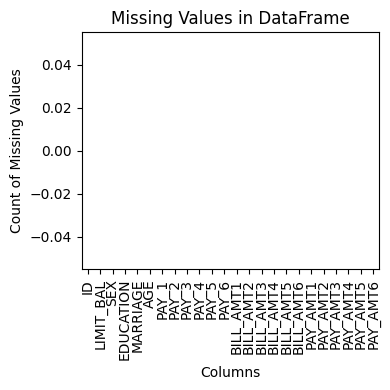

In [212]:
# Create a bar plot
plt.figure(figsize=(4,4))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, palette='Blues_d')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values in DataFrame')
plt.tight_layout()
plt.show()

In [213]:
#Now let's read the y_train dataset to check for class imbalance if any

cards_label = pd.read_csv('/content/CC_y_Train.csv')
cards_label.rename(columns = {'default.payment.next.month':'default_pay'}, inplace=True)
cards_label = cards_label.drop('Unnamed: 0', axis=1)
cards_label.head()

,ID,default_pay
0,1,1
1,2,1
2,3,0
3,4,0
4,5,0


+-------------+-------+
| Default Pay | Count |
+-------------+-------+
|      0      | 21790 |
|      1      |  6210 |
+-------------+-------+


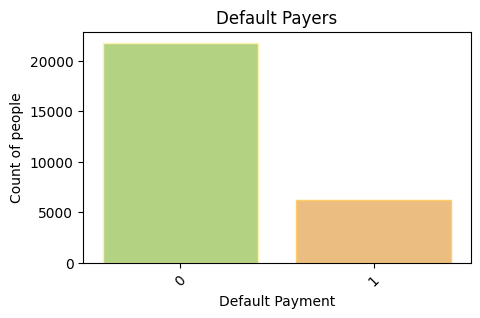

In [214]:
default_pay = cards_label['default_pay'].value_counts()

table = PrettyTable()
table.field_names = ["Default Pay", "Count"]

# Add rows to the table
for value, count in default_pay.items():
    table.add_row([value, count])

# Print the table
print(table)


plt.figure(figsize=(5,3))
sns.barplot(x=default_pay.index, y=default_pay.values, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=45)
plt.title('Default Payers')
plt.xlabel('Default Payment')
plt.ylabel('Count of people')
plt.show()

It shows a much difference between the people who'll make the default payment and those who will not. The number of people who'll make the payment is far less than those who won't.

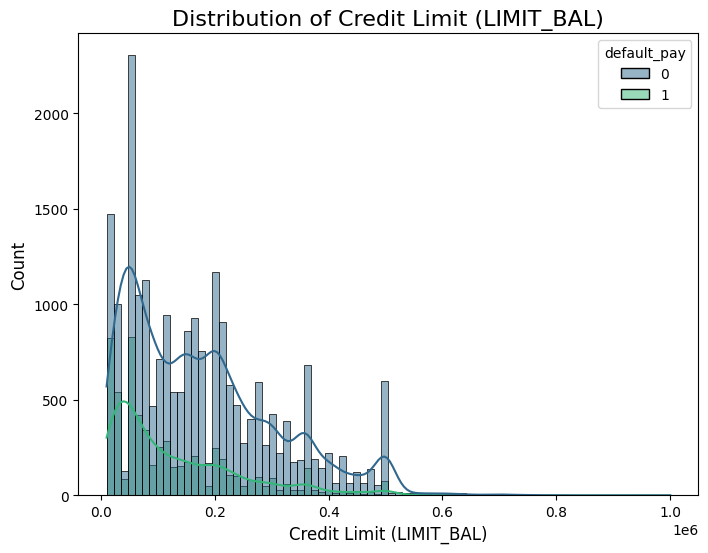

In [215]:
plt.figure(figsize=(8, 6))
sns.histplot(data=cards_df, x='LIMIT_BAL', hue=cards_label.default_pay, kde=True, palette='viridis')
plt.title('Distribution of Credit Limit (LIMIT_BAL)', fontsize=16)
plt.xlabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

It shows that the largest group of amount of credit limit is 50,000 which we also verified from early hypothesis.

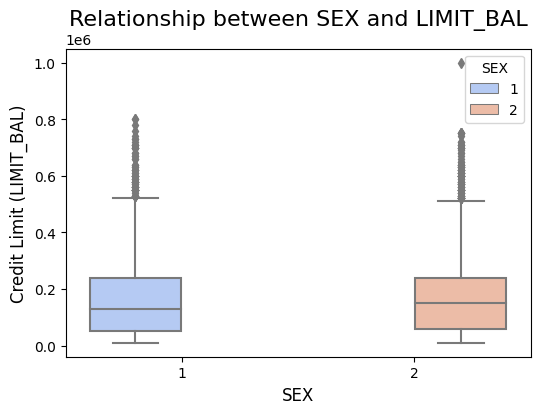

In [216]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the relationship using seaborn
sns.boxplot(data=cards_df, x='SEX', y='LIMIT_BAL', hue='SEX', palette='coolwarm')

# Set the plot title and axis labels
plt.title('Relationship between SEX and LIMIT_BAL', fontsize=16)
plt.xlabel('SEX', fontsize=12)
plt.ylabel('Credit Limit (LIMIT_BAL)', fontsize=12)

# Display the plot
plt.show()

The credit limit is quite balanced between both the genders.

In [217]:
defaulters = cards_df.copy()
defaulters["default_pay"] = cards_label.default_pay
defaulters.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


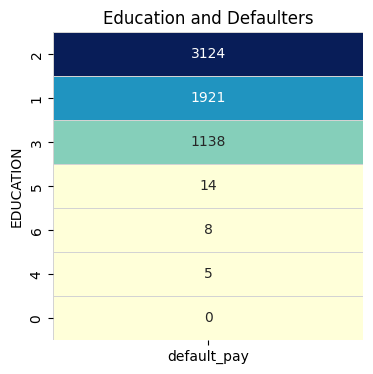

In [218]:
#Is there a connection between education and defaulters?

education = defaulters[['EDUCATION', 'default_pay']].groupby(['EDUCATION'], axis=0).sum().sort_values('default_pay', ascending=False)

plt.figure(figsize=(4,4))
plt.title('Education and Defaulters')

sns.heatmap(education, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.show()

People of graduate school, university, and high school are highly close to making deault payment.



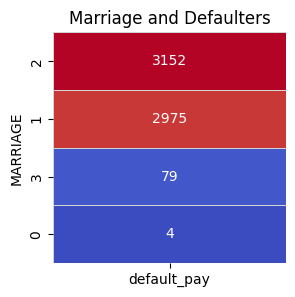

In [219]:
#Is there a connection between marriage and defaulters?

education = defaulters[['MARRIAGE', 'default_pay']].groupby(['MARRIAGE'], axis=0).sum().sort_values('default_pay', ascending=False)

plt.figure(figsize=(3,3))
plt.title('Marriage and Defaulters')

sns.heatmap(education, annot=True, fmt='d', cmap='coolwarm', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.show()

It shows that single people are most likely to default followed by married people. Is there any relationship between single, education level and default? Let's check it out.

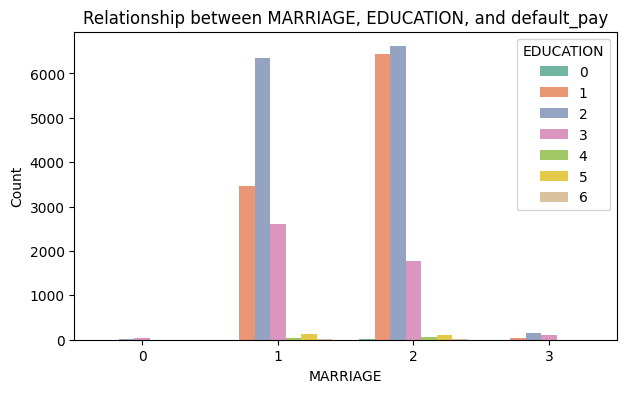

In [220]:
palette = "Set2"

# Plotting the relationship between variables
plt.figure(figsize=(7,4))
sns.countplot(x="MARRIAGE", hue="EDUCATION", data=defaulters, palette=palette)
plt.title("Relationship between MARRIAGE, EDUCATION, and default_pay")
plt.xlabel("MARRIAGE")
plt.ylabel("Count")

# Adjust the legend position
plt.legend(title="EDUCATION", loc="upper right")

plt.show()


The graph shows that the university students are most likely to default when they are single. However, both university students and highschool students are likely to default when they are married. **Does marriage and university has something to do with being default?**

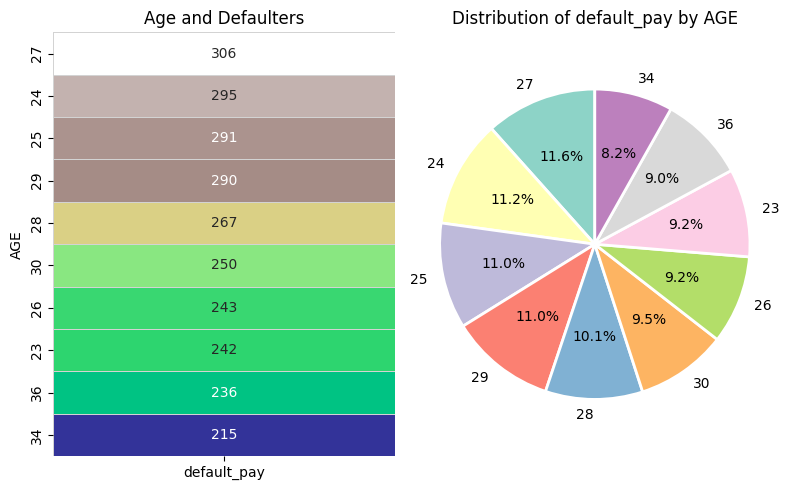

In [221]:
# Is there a connection between people's age and defaulters?
education = defaulters[['AGE', 'default_pay']].groupby(['AGE'], axis=0).sum().sort_values('default_pay', ascending=False)[:10]

palette = "Set3"

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Plot heatmap on the left subplot
axes[0].set_title('Age and Defaulters')
sns.heatmap(education, annot=True, fmt='d', cmap='terrain', cbar=False, linewidths=0.5, linecolor='lightgray', ax=axes[0])

# Plot pie chart on the right subplot
axes[1].set_title("Distribution of default_pay by AGE")
axes[1].pie(education["default_pay"], labels=education.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette(palette), wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
axes[1].axis("equal")  # Ensure the pie is drawn as a circle

plt.tight_layout() 
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

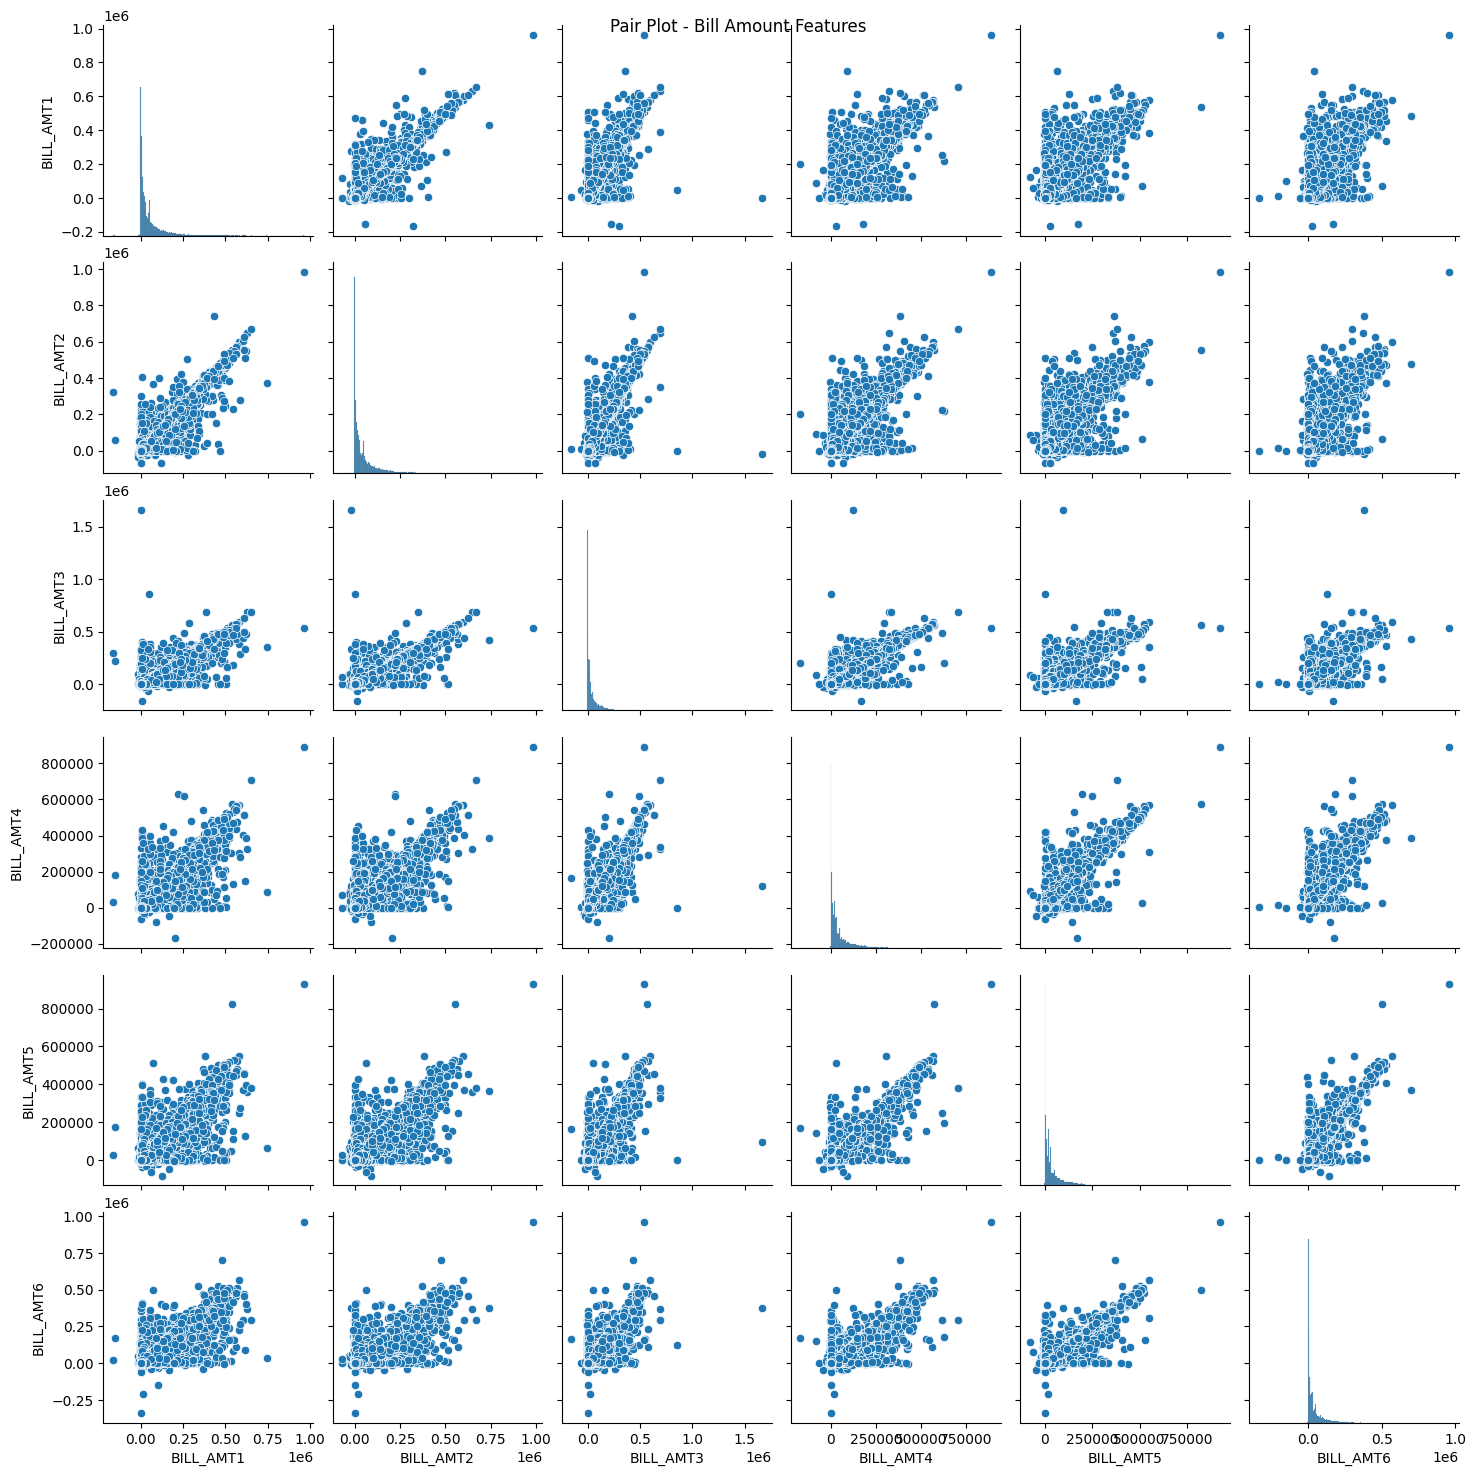

In [222]:
# Select the bill amount columns
bill_amounts = defaulters[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

palette = "Set3"
sns.pairplot(bill_amounts, palette=palette)

plt.suptitle('Pair Plot - Bill Amount Features')
plt.show()

<ipython-input-223-7674bbe8dd37>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


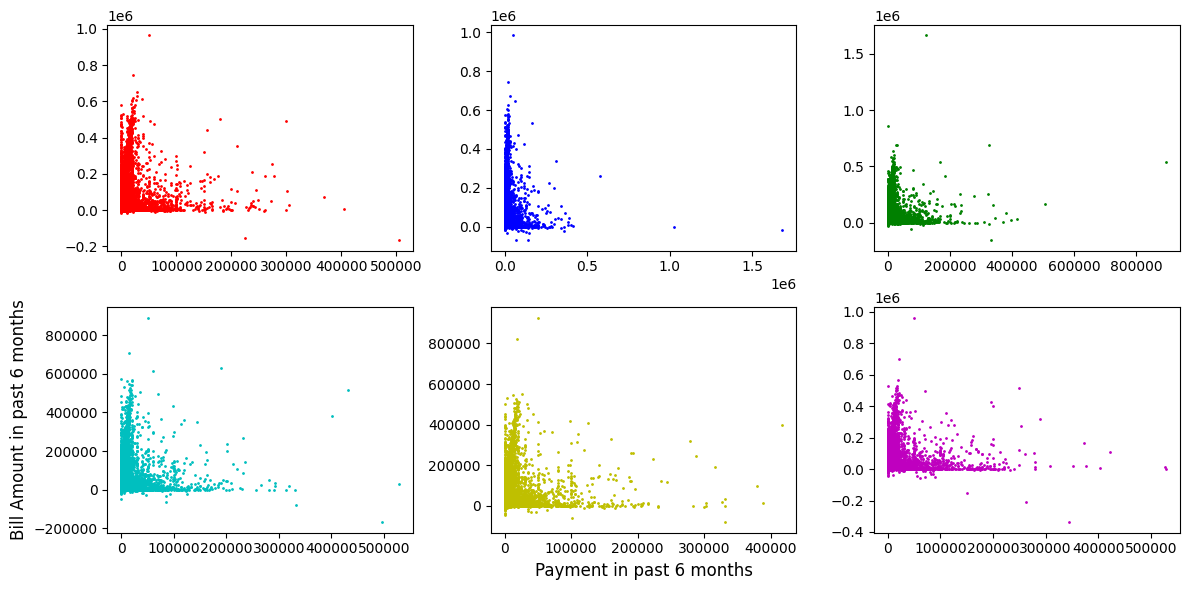

In [223]:
#plotting the relationships between payment amount and bill amount of specific months
plt.subplots(figsize=(12, 6))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y=defaulters.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y=defaulters.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y=defaulters.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y=defaulters.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=12)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y=defaulters.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=12)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)

plt.tight_layout()
plt.show()

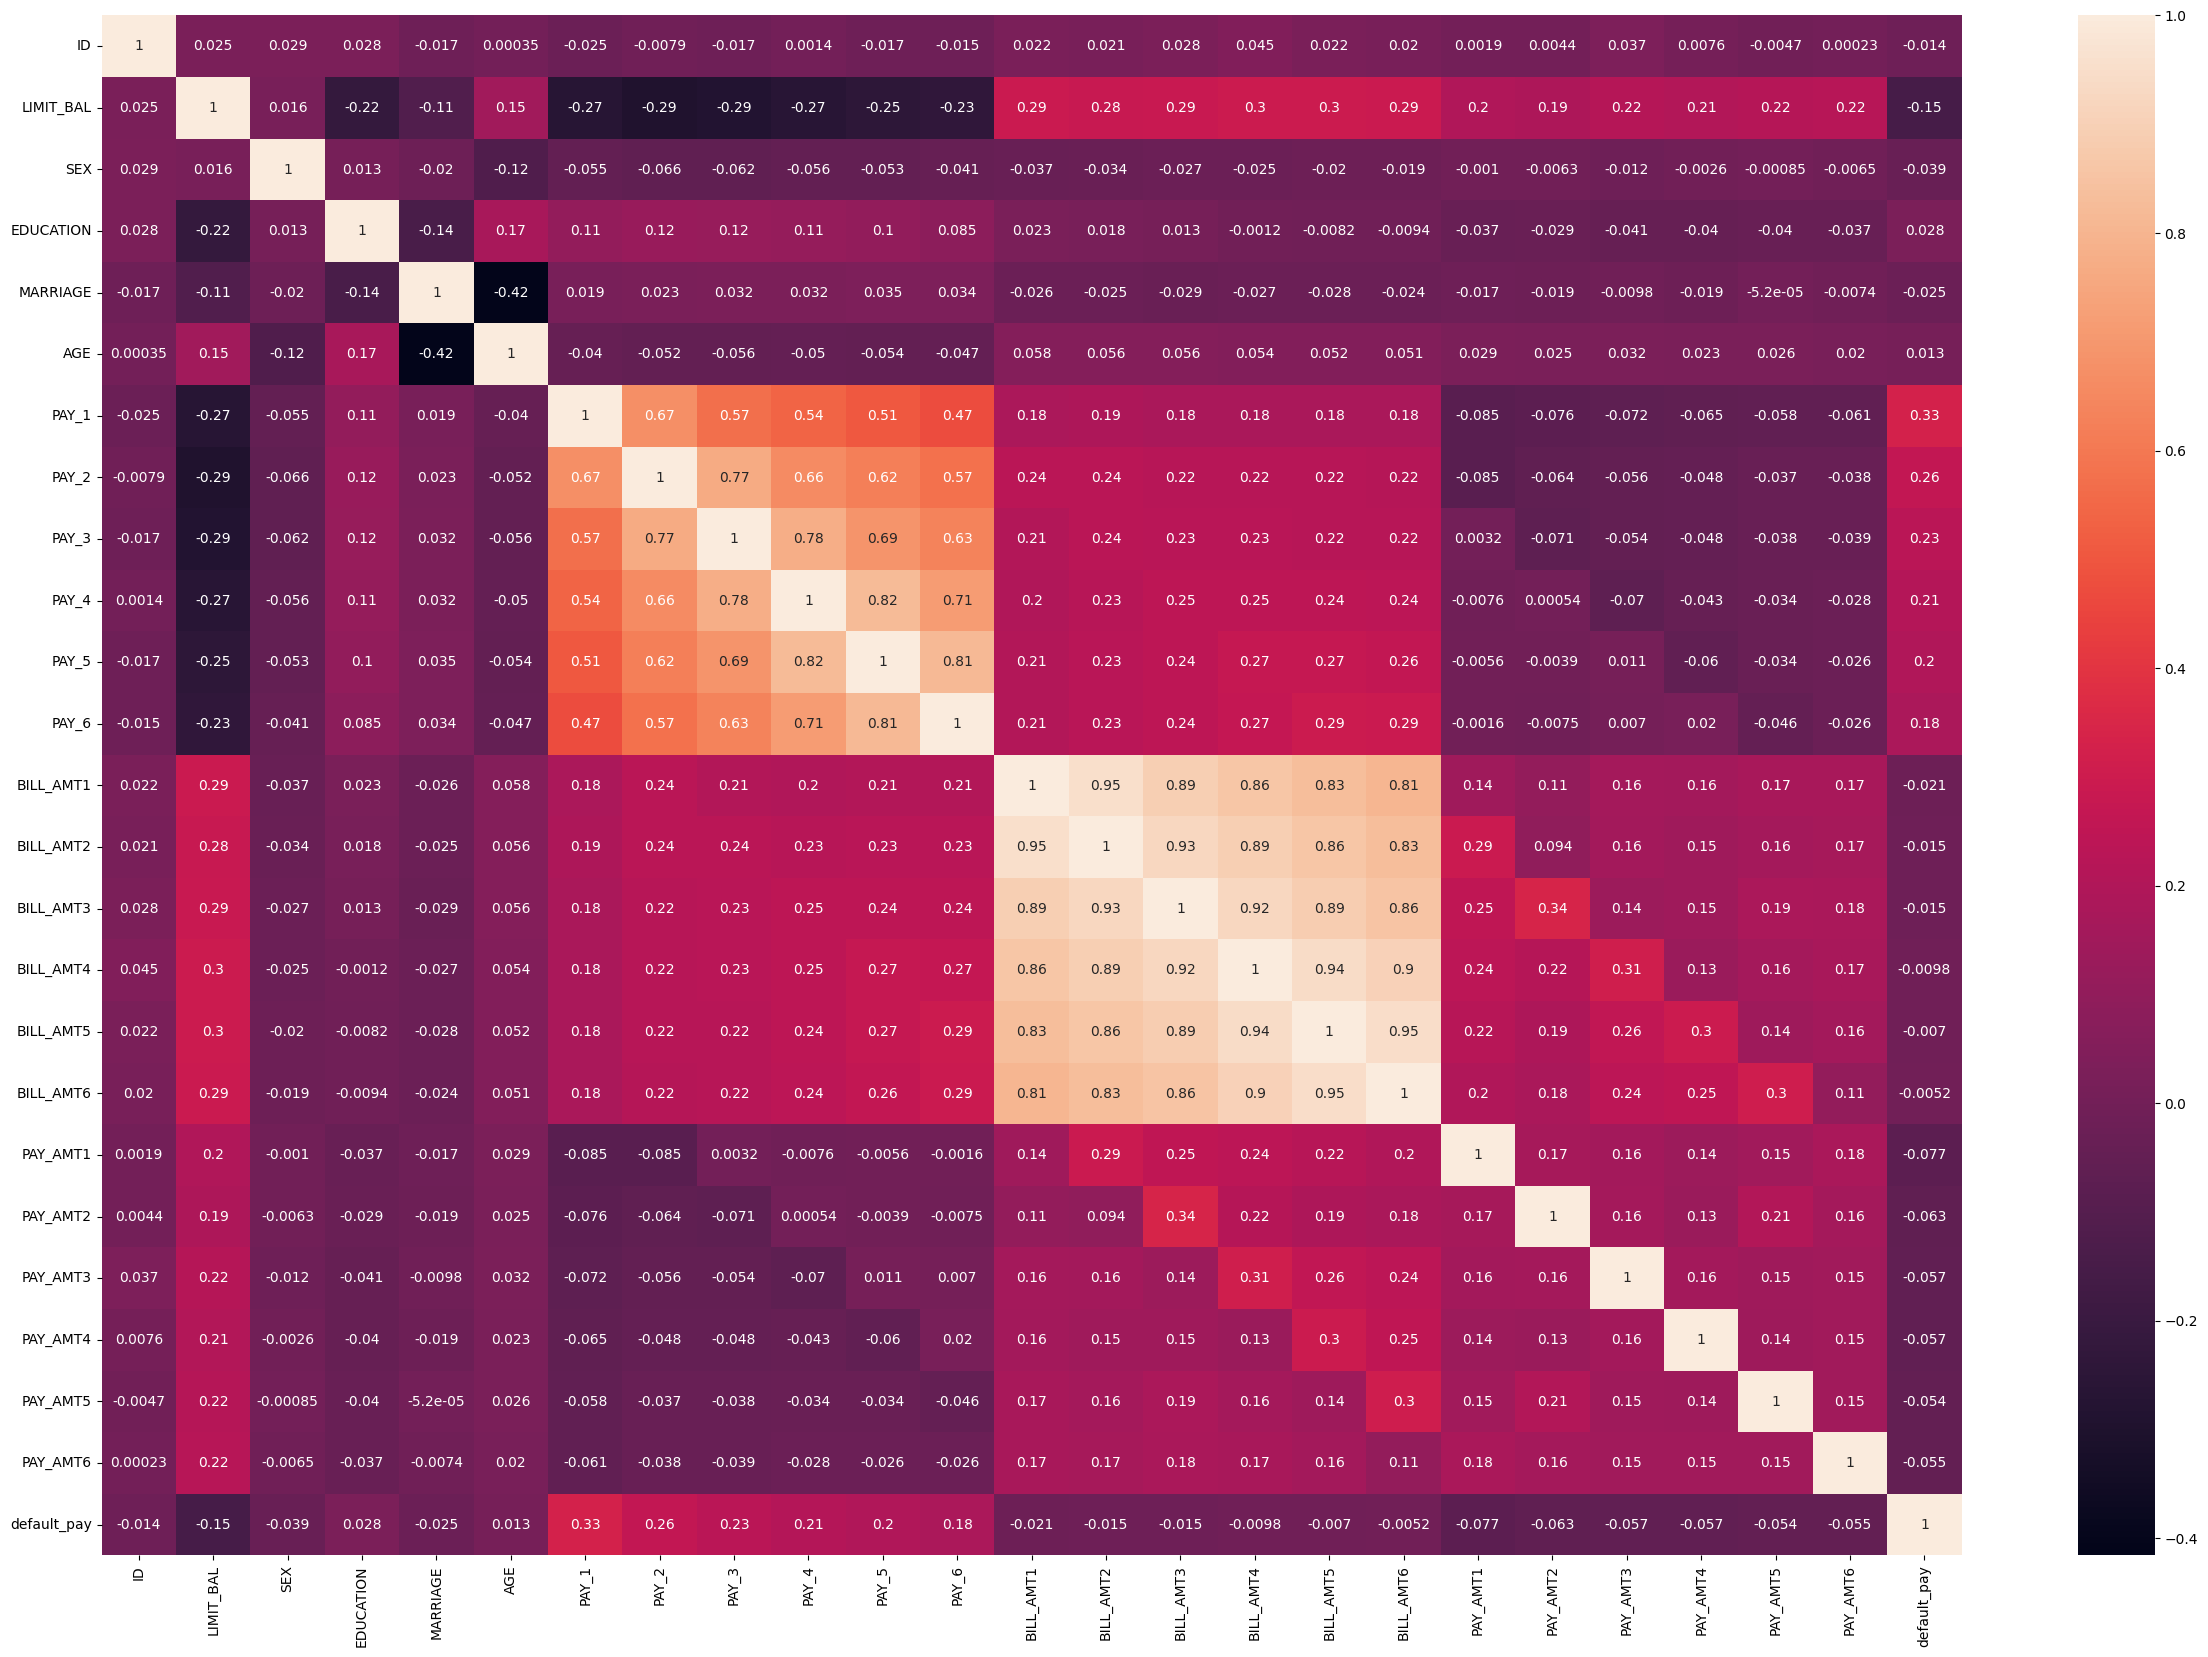

In [224]:
plt.subplots(figsize=(30,20))
sns.heatmap(defaulters.corr(), annot=True)
plt.show()

The very interesting fact that we can determined from the correlation plot is that the payment status of the last 6 months is very important in determining the default status.

**A. Modelling**

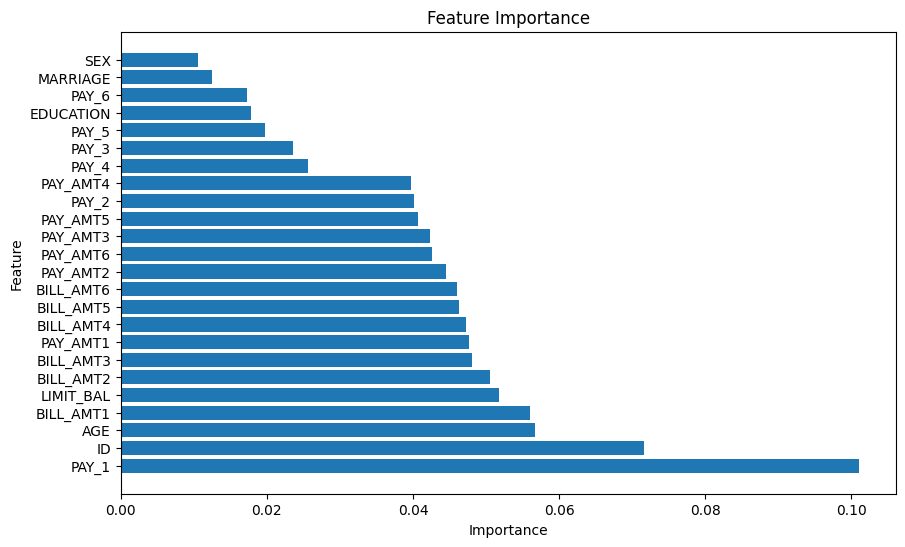

      Feature  Importance
6       PAY_1    0.101023
0          ID    0.071599
5         AGE    0.056631
12  BILL_AMT1    0.055946
1   LIMIT_BAL    0.051818
13  BILL_AMT2    0.050510
14  BILL_AMT3    0.048036
18   PAY_AMT1    0.047606
15  BILL_AMT4    0.047311
16  BILL_AMT5    0.046323
17  BILL_AMT6    0.045979
19   PAY_AMT2    0.044523
23   PAY_AMT6    0.042621
20   PAY_AMT3    0.042359
22   PAY_AMT5    0.040687
7       PAY_2    0.040128
21   PAY_AMT4    0.039765
9       PAY_4    0.025613
8       PAY_3    0.023635
10      PAY_5    0.019702
3   EDUCATION    0.017839
11      PAY_6    0.017262
4    MARRIAGE    0.012482
2         SEX    0.010601


In [225]:
X = defaulters.drop('default_pay', axis=1)
y = defaulters['default_pay']

# Initializing the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Printing the feature importances
print(feature_importances)


In [226]:
def_new = defaulters[["PAY_1", "AGE", "BILL_AMT1", "BILL_AMT2","BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "LIMIT_BAL", "PAY_2", "BILL_AMT2","BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "default_pay"]]

# Splitting the data into features and target
X = def_new.drop('default_pay', axis=1)
y = def_new['default_pay']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


# Training the models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Making predictions
logreg_pred = logreg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)


# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.7814285714285715
Decision Tree Accuracy: 0.7283928571428572
Random Forest Accuracy: 0.8132142857142857


In [227]:
# since we know that our data is imbalanced, let's apply SMOTE to balance the dataset and see if it improves our accuracy.
X = defaulters.drop('default_pay', axis=1)
y = defaulters['default_pay']

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

# Initializing the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb_classifier = xgb.XGBClassifier()

# Training the models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)


# Making predictions
logreg_pred = logreg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb_classifier.predict(X_test)

# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6099128040385497
Decision Tree Accuracy: 0.757916475447453
Random Forest Accuracy: 0.8448829738412116
XGBoost Accuracy: 0.8267553923818265


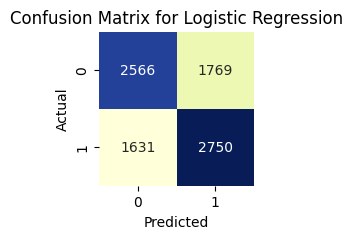

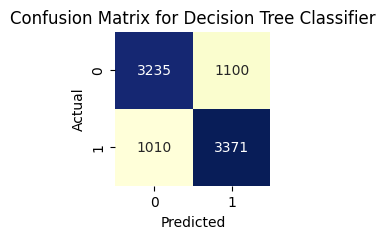

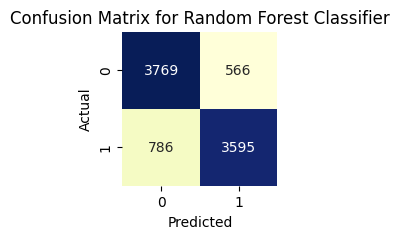

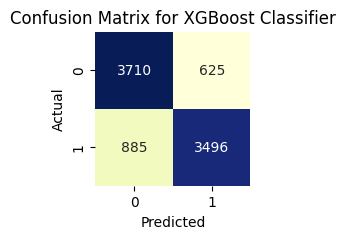

In [228]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title('Confusion Matrix for ' + model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.show()

# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test, logreg_pred, labels=[0, 1], model_name = "Logistic Regression")
plot_confusion_matrix(y_test, dt_pred, labels=[0, 1], model_name = "Decision Tree Classifier")
plot_confusion_matrix(y_test, rf_pred, labels=[0, 1], model_name = "Random Forest Classifier")
plot_confusion_matrix(y_test, xgb_pred, labels=[0, 1], model_name = "XGBoost Classifier")

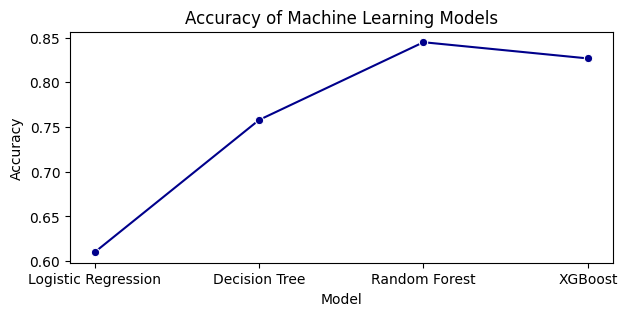

In [229]:
# Plotting the accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [logreg_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy]

plt.figure(figsize=(7,3))
sns.lineplot(x=models, y=accuracies, marker='o', color='darkblue')
plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

We can see that we have got our highest accuracy on **Random Forest Regressor**, thus we will be using tha to make predictions.

In [230]:
test_df = pd.read_csv("/content/CC_X_Test.csv")
test_df = test_df.drop('Unnamed: 0', axis=1)
test_df.rename(columns={'PAY_0':'PAY_1'}, inplace= True)
test_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,28001,30000.0,2,2,1,29,1,2,2,2,...,29703.0,28700.0,28300.0,25520.0,0.0,3500.0,0.0,0.0,1000.0,0.0
1,28002,150000.0,2,1,2,29,0,0,0,0,...,136196.0,105989.0,98836.0,94504.0,5200.0,7982.0,4500.0,4048.0,3800.0,3818.0
2,28003,230000.0,2,1,2,29,2,-1,-1,-1,...,711.0,711.0,711.0,291.0,711.0,711.0,711.0,711.0,291.0,1131.0
3,28004,510000.0,2,1,2,30,-1,-1,-1,-1,...,559712.0,163628.0,117475.0,116656.0,493358.0,1227082.0,164577.0,510.0,6239.0,4550.0
4,28005,20000.0,2,2,2,30,1,2,0,0,...,18979.0,7886.0,19786.0,20025.0,0.0,7027.0,1000.0,19000.0,6000.0,1000.0


In [231]:
test_preds = rf.predict(test_df)
test_preds

array([1, 0, 1, ..., 0, 0, 0])

In [232]:
test_df["DEFAULT_PAY"] = test_preds
test_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
0,28001,30000.0,2,2,1,29,1,2,2,2,...,28700.0,28300.0,25520.0,0.0,3500.0,0.0,0.0,1000.0,0.0,1
1,28002,150000.0,2,1,2,29,0,0,0,0,...,105989.0,98836.0,94504.0,5200.0,7982.0,4500.0,4048.0,3800.0,3818.0,0
2,28003,230000.0,2,1,2,29,2,-1,-1,-1,...,711.0,711.0,291.0,711.0,711.0,711.0,711.0,291.0,1131.0,1
3,28004,510000.0,2,1,2,30,-1,-1,-1,-1,...,163628.0,117475.0,116656.0,493358.0,1227082.0,164577.0,510.0,6239.0,4550.0,0
4,28005,20000.0,2,2,2,30,1,2,0,0,...,7886.0,19786.0,20025.0,0.0,7027.0,1000.0,19000.0,6000.0,1000.0,0


In [233]:
test_df.to_csv("CreditScoring_Final.csv")

**B. Assuming a batch prediction setup, suggest improvements to the train-test split used.**

**1) Stratified Split:** If your dataset has class imbalance, it's important to maintain the same class distribution in both the training and testing sets. You can use stratified sampling techniques, such as stratified splitting, to ensure that the proportion of each class is preserved in both sets.

**2) Cross-Validation:** Instead of a single train-test split, you can use cross-validation techniques, such as k-fold cross-validation or stratified k-fold cross-validation, to get a better estimate of model performance. This involves splitting the data into multiple folds, training the model on each fold while evaluating on the remaining folds, and then averaging the performance metrics across all folds.

**3) Random Seed:** Set a random seed when performing the train-test split to ensure reproducibility. This way, if you rerun your code, you will get the same train-test split each time. This is especially important when comparing different models or parameter tuning.

**4) Validation Set:** Consider setting aside a separate validation set in addition to the training and testing sets. This validation set can be used for fine-tuning model hyperparameters or making early stopping decisions during training.
